## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving book.csv to book.csv


{'book.csv': b',User.ID,Book.Title,Book.Rating\r\n1,276726,Classical Mythology,5\r\n2,276729,Clara Callan,3\r\n3,276729,Decision in Normandy,6\r\n4,276736,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,8\r\n5,276737,The Mummies of Urumchi,6\r\n6,276744,The Kitchen God\'s Wife,7\r\n7,276745,What If?: The World\'s Foremost Military Historians Imagine What Might Have Been,10\r\n8,276747,PLEADING GUILTY,9\r\n9,276747,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,9\r\n10,276747,Where You\'ll Find Me: And Other Stories,8\r\n11,276747,Nights Below Station Street,7\r\n12,276747,Hitler\'s Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,7\r\n13,276748,The Middle Stories,6\r\n14,276751,Jane Doe,8\r\n15,276754,A Second Chicken Soup for the Woman\'s Soul (Chicken Soup for the Soul Series),8\r\n16,276755,The Witchfinder (Amos Walker Mystery Series),5\r\n17,276760,More Cunning Than Man: A Social Histor

##Importing Data

In [ ]:
books = pd.read_csv("book.csv", encoding = "ISO-8859-1")
books.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [ ]:
books.shape

(10000, 4)

In [ ]:
#Renaming The Columns
books = books.rename({'Book.Title':'Title','User.ID':'UserId','Book.Rating':'Rating'},axis=1)
books

,Unnamed: 0,UserId,Title,Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [ ]:
#Dropping Unecessary Columns
book = books.drop(['Unnamed: 0'], axis = 1)
book.head(20)

,UserId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
6,276745,What If?: The World's Foremost Military Histor...,10
7,276747,PLEADING GUILTY,9
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8


In [ ]:
#Grouping Data - EDA
book.groupby("Title")["Rating"].mean().sort_values(ascending=False).head(10)

Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
The Pillars of the Earth                                                                                              10.0
Principia Discordia                                                                                                   10.0
COWBOY                                                                                                                10.0
Design for

In [ ]:
book.groupby("Title")["Rating"].mean().sort_values(ascending=True).head(10)

Title
THIS SIDE OF PARADISE (A Scribner Classic)                                                     1.0
Saucer                                                                                         1.0
Having Our Say: The Delany Sisters' First 100 Years                                            1.0
Upsetting the Balance (Worldwar Series, Volume 3)                                              1.0
Time and Chance                                                                                1.0
The Milk Mustache Book: A Behind-The-Scenes Look at America's Favorite Advertising Campaign    1.0
Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)                                     1.0
Justice: Crimes, Trials, and Punishments                                                       1.0
Justice (Peter Decker &amp; Rina Lazarus Novels (Paperback))                                   1.0
Clear Springs : A Family Story                                                                 1.0
Name

In [ ]:
book.groupby("Title")["Rating"].count().sort_values(ascending=False).head()

Title
Fahrenheit 451                                   5
Ender's Game (Ender Wiggins Saga (Paperback))    4
Stardust                                         4
Vanished                                         4
Charlie and the Chocolate Factory                4
Name: Rating, dtype: int64

In [ ]:
rating = pd.DataFrame(book.groupby('Title')['Rating'].mean())
rating

,Rating
Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0
"\Well, there's your problem\: Cartoons",9.0
iI Paradiso Degli Orchi,7.0


In [ ]:
len(books['Title'].unique())

9659

In [ ]:
book["Rating"].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

In [ ]:
len(book['UserId'].unique())

2182

<Axes: >

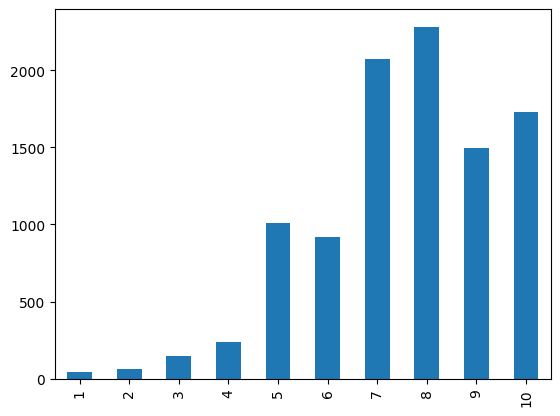

In [ ]:
book['Rating'].value_counts().sort_index().plot(kind='bar')

In [ ]:
book.sort_values('Rating')

,UserId,Title,Rating
4337,1733,Welcome to the Funny Farm: The All-True Misadv...,1
4540,1903,Mrs. Mike,1
640,277363,Children of the Night,1
6144,2985,Groom For Maggie (Whirlwind Weddings) (Silhoue...,1
4523,1903,Selected Poems,1
...,...,...,...
2636,243,"Between Silk and Cyanide: A Codemaker's War, 1...",10
6087,2977,Blankets of Sand: Poems of War and Exile,10
8414,161001,Spencer'S Secret (The Spencer Brothers) (Harle...,10
8437,161037,Meant To Marry (The Marriage Maker) (Harlequi...,10


In [ ]:
#Now let's create a matrix/pivot table that has the user ids on one access and the movie title on another axis
books_new = book.pivot_table(index='UserId', columns='Title', values='Rating')
books_new

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [ ]:
#Impute those NaNs with 0 values
books_new.fillna(0, inplace=True)

In [ ]:
len(books_new)

2182

In [ ]:
#Most rated book
rating.sort_values('Rating',ascending=False).head(10)

,Rating
Title,
"Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)",10.0
The Piano Man's Daughter,10.0
Private Screening,10.0
"The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines",10.0
Desert Solitaire,10.0
The Pillars of the Earth,10.0
Principia Discordia,10.0
COWBOY,10.0
Design for Dying,10.0


In [ ]:
#Let's choose two books: Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269). And Liar The Pillars of the Earth.
#Now let's grab the user ratings for those two movies
Desert_Solitaire = books_new['Desert Solitaire']
Principia_Discordia = books_new['Principia Discordia']

In [ ]:
#We can then use corrwith() method to get correlations between two pandas series
similar_to_DesertSolitaire = books_new.corrwith(Desert_Solitaire)
similar_to_PrincipiaDiscordia = books_new.corrwith(Principia_Discordia)

In [ ]:
#Let's clean this by removing NaN values and using a DataFrame instead of a series
corr_PrincipiaDiscordia = pd.DataFrame(similar_to_PrincipiaDiscordia,columns=['Correlation'])
corr_PrincipiaDiscordia.dropna(inplace=True)
corr_PrincipiaDiscordia.head()

,Correlation
Title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [ ]:
corr_PrincipiaDiscordia.sort_values('Correlation',ascending=True).head(10)

,Correlation
Title,
Fahrenheit 451,-0.000958
Stardust,-0.000913
"The Subtle Knife (His Dark Materials, Book 2)",-0.000911
Charlie and the Chocolate Factory,-0.000904
Vanished,-0.000904
Ender's Game (Ender Wiggins Saga (Paperback)),-0.000898
"The Amber Spyglass (His Dark Materials, Book 3)",-0.000879
Strangers,-0.000793
The Face,-0.000791


In [ ]:
#Let's join this with Number of Ratings column in ratings data frame
corr_PrincipiaDiscordia = corr_PrincipiaDiscordia.join(rating['Rating'])
corr_PrincipiaDiscordia.head()

,Correlation,Rating
Title,,
"Jason, Madison &amp",-0.000459,8.0
Other Stories;Merril;1985;McClelland &amp,-0.000459,6.0
Repairing PC Drives &amp,-0.000459,4.0
'48,-0.000459,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459,8.0


In [ ]:
#et's filter out books that have less than 10 reviews and Now sort the values and notice how the titles make a lot more sense
corr_PrincipiaDiscordia[corr_PrincipiaDiscordia['Rating']>8].sort_values('Correlation',ascending=False).head()

,Correlation,Rating
Title,,
The Colors of Space,1.0,10.0
Under a War-Torn Sky,1.0,10.0
Darkover Landfall 1,1.0,10.0
Day of Honor (Star Trek Voyager),1.0,10.0
TIME GATE,1.0,10.0


In [ ]:
#Now the same for the comedy Liar Liar
corr_DesertSolitaire = pd.DataFrame(similar_to_DesertSolitaire,columns=['Correlation'])
corr_DesertSolitaire.dropna(inplace=True)
corr_DesertSolitaire = corr_DesertSolitaire.join(rating['Rating'])
corr_DesertSolitaire[corr_DesertSolitaire['Rating']>9].sort_values('Correlation',ascending=False).head()

,Correlation,Rating
Title,,
The Dragon King's Palace: A Novel,1.0,10.0
Final Curtain,1.0,10.0
The Virgin's Knot,1.0,10.0
Sacajawea (Lewis &amp; Clark Expedition),1.0,10.0
Dead Water,1.0,10.0
